# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
type(cities)

list

In [5]:
# I tried for a single city and then try all the cities
URL ="http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
query_url = f"{URL}appid={weather_api_key}&units={units}&q="
restest = requests.get(query_url+ 'london').json()
restest

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 47.79,
  'feels_like': 40.42,
  'temp_min': 46,
  'temp_max': 48.99,
  'pressure': 1001,
  'humidity': 88},
 'visibility': 10000,
 'wind': {'speed': 10.76, 'deg': 233},
 'clouds': {'all': 0},
 'dt': 1603842540,
 'sys': {'type': 3,
  'id': 2019646,
  'country': 'GB',
  'sunrise': 1603781142,
  'sunset': 1603816968},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [6]:
print(cities)

['iquique', 'mahebourg', 'biak', 'cairo', 'ushuaia', 'illoqqortoormiut', 'georgetown', 'yabassi', 'saldanha', 'butaritari', 'bengkulu', 'nanortalik', 'constitucion', 'batagay-alyta', 'sentyabrskiy', 'puerto ayora', 'kapaa', 'atuona', 'weinan', 'san cristobal', 'attawapiskat', 'saskylakh', 'khatanga', 'toliary', 'port alfred', 'astoria', 'bambous virieux', 'rikitea', 'faanui', 'mataura', 'tuktoyaktuk', 'taolanaro', 'sorland', 'pangnirtung', 'klaksvik', 'margate', 'saint george', 'punta arenas', 'terenos', 'barrow', 'hobart', 'ryotsu', 'ponta do sol', 'severo-kurilsk', 'hilo', 'myitkyina', 'carnarvon', 'barbar', 'celestun', 'raudeberg', 'soe', 'hermanus', 'vardo', 'asau', 'srednekolymsk', 'asekeyevo', 'tautira', 'nikolskoye', 'songjianghe', 'huarmey', 'mullaitivu', 'lompoc', 'ribeira grande', 'yellowknife', 'lolua', 'salalah', 'muros', 'guerrero negro', 'cabedelo', 'namatanai', 'panormos', 'adrar', 'los llanos de aridane', 'tura', 'kloulklubed', 'ulagan', 'saint-pierre', 'rawannawi', 'bi

In [21]:
# set up lists to hold reponse info
city_ID    =[]
name       =[]
cloudiness =[]
country    =[]
date       =[]
humidity   =[]
lat        =[]
lng        =[]
maxtemp    =[]
windspeed  =[]

for city in cities:
    response = requests.get(query_url+city).json()
        #f"{query_url}&q={city}").json()
    
    try:
        city_ID.append(response['id'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        name.append(response['name'])
        print(f"{city} {response['id']}")
    
    except(KeyError, IndexError):

        print("Missing City... skipping.")
        

iquique 3887127
mahebourg 934322
biak 1637001
cairo 360630
ushuaia 3833367
Missing City... skipping.
georgetown 1735106
yabassi 2221046
saldanha 3361934
butaritari 2110227
bengkulu 1649150
nanortalik 3421765
constitucion 3893726
batagay-alyta 2027042
Missing City... skipping.
puerto ayora 3652764
kapaa 5848280
atuona 4020109
weinan 1791636
san cristobal 3628473
Missing City... skipping.
saskylakh 2017155
khatanga 2022572
Missing City... skipping.
port alfred 964432
astoria 5711847
bambous virieux 1106677
rikitea 4030556
faanui 4034551
mataura 6201424
tuktoyaktuk 6170031
Missing City... skipping.
sorland 3137469
pangnirtung 6096551
klaksvik 2618795
margate 2643044
saint george 5546220
punta arenas 3874787
terenos 3446619
barrow 5880054
hobart 2163355
ryotsu 1853371
ponta do sol 2264557
severo-kurilsk 2121385
hilo 5855927
myitkyina 1307741
carnarvon 2074865
Missing City... skipping.
celestun 3531368
raudeberg 3146487
soe 1626703
hermanus 3366880
vardo 777019
asau 686090
srednekolymsk 212

kilindoni 157429
mingshui 1800498
silale 594693
ambovombe 1079048
savinka 498295
kushmurun 1519924
maniitsoq 3421982
dikson 1507390
abu samrah 172515
taltal 3870243
finschhafen 2097418
penon blanco 3992967
russell 4047434
ayan 2027316
todos santos 3981432
Missing City... skipping.
Missing City... skipping.
kiruna 605155
Missing City... skipping.
chicama 3698359
zelenoborsk 1485286
pisco 3932145
cacequi 3468553
mahibadhoo 1337605
tefe 3661944
deputatskiy 2028164
malanje 2239862
bam 141736
neiafu 4032420
santa rosa 1687894
usinsk 863061
Missing City... skipping.
sungaipenuh 1625929
dharchula 1272864
parrita 3622537
dharmadam 1272856
Missing City... skipping.
kokopo 2093685
bulgan 2032201
dongsheng 1812256
abu dhabi 292968
dergachi 566456
matola 1039854
nevers 2990473
horn lake 4430400
urumqi 1529102
palmer 4946620
nemuro 2128975
Missing City... skipping.
syracuse 2523082
faya 110690
sinnamary 3380290
Missing City... skipping.
husavik 2629833
krasnoselkup 1502073
sabya 102651
longhua 1802

In [14]:
print(response)

{'cod': '404', 'message': 'city not found'}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
# create a data frame 
citiesDF= pd.DataFrame({
    "City_ID"    : city_ID,
    "city"       : name,
    "Cloudiness" : cloudiness,
    "Country"    : country,
    "Date"       : date,
    "Humidity"   : humidity,
    "Lat"        : lat,
    "Lng"        : lng,
    "Max Temp"   : maxtemp,
    "Wind Speed" : windspeed
})

In [23]:
citiesDF.to_csv("output_data/cities.csv")

In [24]:
citiesDF.head()

,City_ID,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,3887127,Iquique,0,CL,1603843991,68,-20.22,-70.14,64.40,13.87
1,934322,Mahébourg,3,MU,1603843991,80,-20.41,57.70,70.00,1.99
2,1637001,Biak,99,ID,1603843775,67,-0.91,122.88,82.62,3.74
3,360630,Cairo,20,EG,1603843951,73,30.06,31.25,71.60,6.93
4,3833367,Ushuaia,40,AR,1603843840,39,-54.80,-68.30,46.40,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, '#### Latitude vs. Temperature Plot')

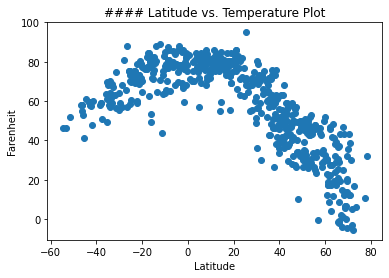

In [25]:
plt.scatter(citiesDF["Lat"], citiesDF["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Farenheit")
plt.title("#### Latitude vs. Temperature Plot")

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity Plot')

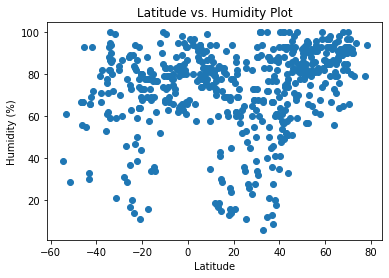

In [26]:
plt.scatter(citiesDF["Lat"], citiesDF["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity Plot")

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness Plot')

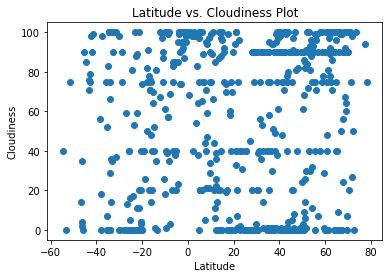

In [27]:
plt.scatter(citiesDF["Lat"], citiesDF["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness Plot")

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed Plot')

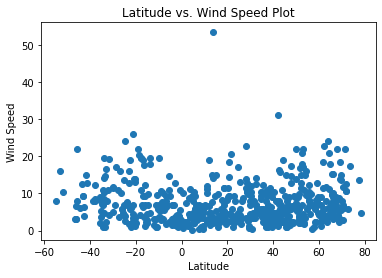

In [28]:
plt.scatter(citiesDF["Lat"], citiesDF["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed Plot")

## Linear Regression

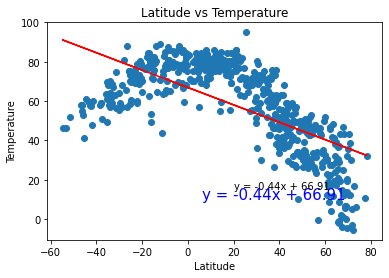

In [29]:
# OPTIONAL: Create a function to create Linear Regression plots
x_values = citiesDF['Lat']
y_values = citiesDF['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Latitude vs Temperature")
plt.annotate(line_eq, (20,15))
plt.show()

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
#north latitude positive and south negative

In [31]:
# Northern Hemisphere DataFrame
Northern=citiesDF.loc[citiesDF["Lat"]>0]
Northern

,City_ID,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
3,360630,Cairo,20,EG,1603843951,73,30.06,31.25,71.60,6.93
5,1735106,George Town,20,MY,1603843992,94,5.41,100.34,77.00,3.36
6,2221046,Yabassi,64,CM,1603843992,91,4.46,9.97,74.98,0.16
8,2110227,Butaritari,98,KI,1603843993,66,3.07,172.79,80.98,4.43
10,3421765,Nanortalik,100,GL,1603843993,90,60.14,-45.24,30.42,4.25
...,...,...,...,...,...,...,...,...,...,...
555,2120047,Ust'-Omchug,0,RU,1603844135,85,61.15,149.63,19.09,1.21
556,5380437,Pacific Grove,1,US,1603844135,13,36.62,-121.92,73.40,5.82
557,3421319,Nuuk,0,GL,1603843945,79,64.18,-51.72,24.01,5.99
558,2460954,Araouane,0,ML,1603844136,14,18.90,-3.53,84.52,3.04


In [32]:
# Southern Hemisphere DataFrame
Southern=citiesDF.loc[citiesDF["Lat"]<0]
Southern

,City_ID,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,3887127,Iquique,0,CL,1603843991,68,-20.22,-70.14,64.40,13.87
1,934322,Mahébourg,3,MU,1603843991,80,-20.41,57.70,70.00,1.99
2,1637001,Biak,99,ID,1603843775,67,-0.91,122.88,82.62,3.74
4,3833367,Ushuaia,40,AR,1603843840,39,-54.80,-68.30,46.40,8.05
7,3361934,Saldanha,100,ZA,1603843992,87,-33.01,17.94,59.00,2.24
...,...,...,...,...,...,...,...,...,...,...
538,1644605,Galesong,20,ID,1603844127,88,-5.32,119.37,78.80,2.24
541,3405051,Borba,95,BR,1603844128,95,-4.39,-59.59,74.79,1.54
548,3445418,Vazante,50,BR,1603844115,69,-17.99,-46.91,76.53,4.27
553,3837213,San Juan,37,AR,1603844134,21,-31.54,-68.54,74.57,19.19


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

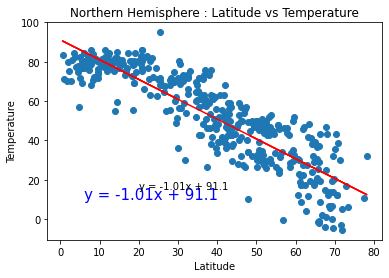

In [33]:
x_values = Northern['Lat']
y_values = Northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Northern Hemisphere : Latitude vs Temperature")
plt.annotate(line_eq, (20,15))
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

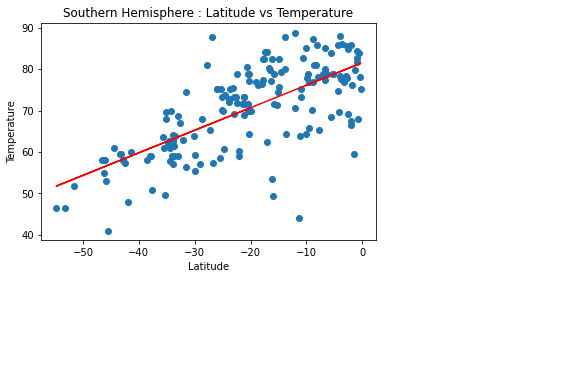

In [34]:
x_values = Southern['Lat']
y_values = Southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Southern Hemisphere : Latitude vs Temperature")
plt.annotate(line_eq, (20,15))
plt.show()

In [ ]:
#Explanations:
#this lineal regression explains how distance from the ecuator affects for max temperatures.
#My guess, it is that such temperatures may happen on summer time for North Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

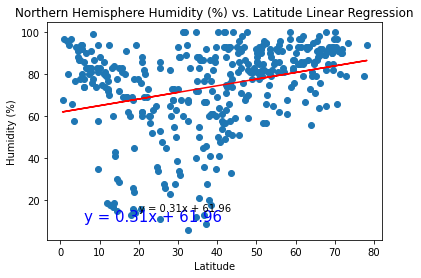

In [35]:
x_values = Northern['Lat']
y_values = Northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere Humidity (%) vs. Latitude Linear Regression")
plt.annotate(line_eq, (20,15))
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

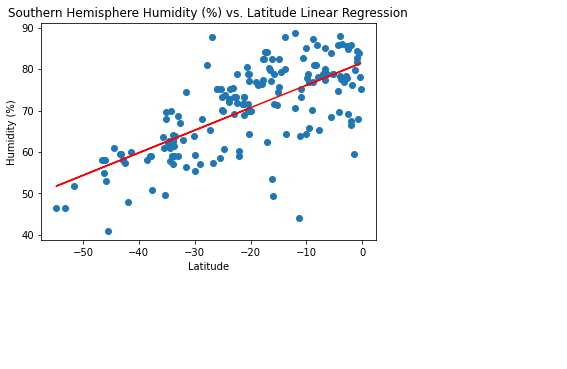

In [36]:
x_values = Southern['Lat']
y_values = Southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere Humidity (%) vs. Latitude Linear Regression")
plt.annotate(line_eq, (20,15))
plt.show()

In [ ]:
#Explanations:
#this lineal regression explains how distance from the ecuator affects for Humidity.
#Seems that it changes in reference to distance from the ecuador and in reference to the poles.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

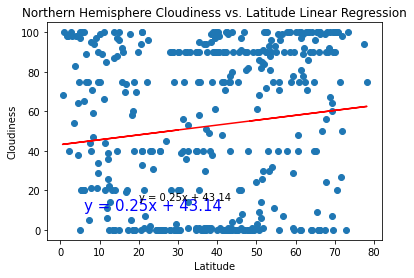

In [37]:
x_values = Northern['Lat']
y_values = Northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere Cloudiness vs. Latitude Linear Regression")
plt.annotate(line_eq, (20,15))
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

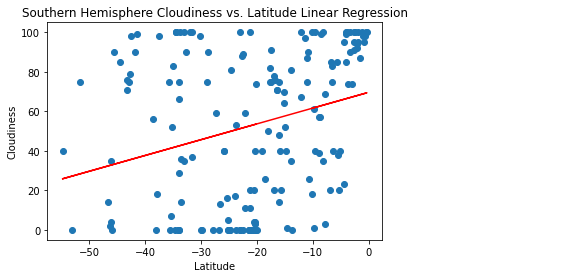

In [38]:
x_values = Southern['Lat']
y_values = Southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Cloudiness vs. Latitude Linear Regression")
plt.annotate(line_eq, (20,15))
plt.show()

In [ ]:
#Explanations:
#this lineal regression explains how distance from the ecuator affects for existece of clouds.
#This can not be concistent because this could be affected by other factors like winds and Temperatures that may cause these clouds and sometimes storms and typhons.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

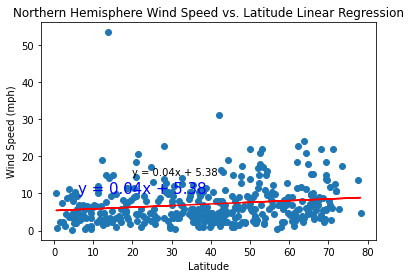

In [39]:
x_values = Northern['Lat']
y_values = Northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hemisphere Wind Speed vs. Latitude Linear Regression")
plt.annotate(line_eq, (20,15))
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

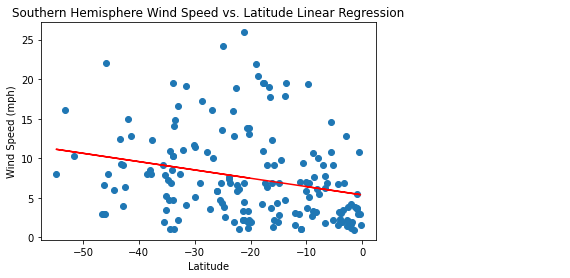

In [40]:
x_values = Southern['Lat']
y_values = Southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere Wind Speed vs. Latitude Linear Regression")
plt.annotate(line_eq, (20,15))
plt.show()

In [ ]:
#Explanations:
#this lineal regression explains how distance from the ecuator affects for wind speed
#This also can be affected by storms,heigh or if it is in a mountain or a valley just too mention other factors.